In [43]:
import pandas as pd
import hashlib

In [44]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [45]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261693,KNDC4DLC8P,Clark,Vancouver,WA,98665.0,2023,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,49.0,234925078,POINT (-122.64443 45.67871),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
261694,1GYKPNRL6S,Snohomish,Snohomish,WA,98296.0,2025,CADILLAC,LYRIQ,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,275487509,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,5.306105e+10
261695,1N4BZ0CP8G,King,Seattle,WA,98144.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,37.0,117655261,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
261696,7SAYGDEE8T,King,Renton,WA,98055.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,282644701,POINT (-122.20784 47.46004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


# 1. Data Cleaning Questions

How many missing values exist in the dataset, and in which columns?

In [46]:
missing_values = df.isna().sum()

In [47]:
missing_values

VIN (1-10)                                             0
County                                                10
City                                                  10
State                                                  0
Postal Code                                           10
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 628
DOL Vehicle ID                                         0
Vehicle Location                                      18
Electric Utility                                      10
2020 Census Tract                                     10
dtype: int64

In [48]:
df['Base MSRP'] = df['Base MSRP'].replace(0, pd.NA)

 How should missing or zero values in the Base MSRP and Electric Range columns be handled ?

In [49]:
df['Base MSRP'].isna().sum()

np.int64(258513)

In [50]:
df['Electric Range'] = df['Electric Range'].replace(0, pd.NA)

In [51]:
df['Electric Range'].isna().sum()

np.int64(160891)

In [52]:
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].median())

C:\Users\Suraj\AppData\Local\Temp\ipykernel_9468\2011867229.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].median())


In [53]:
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())

C:\Users\Suraj\AppData\Local\Temp\ipykernel_9468\622055649.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())


In [54]:
df['Base MSRP'].isna().sum()

np.int64(0)

In [55]:
df['Electric Range'].isna().sum()

np.int64(0)

Are there duplicate records in the dataset? If so, how should they be managed?

In [56]:
full_duplicates = df.duplicated().sum()

In [57]:
full_duplicates

np.int64(0)

In [58]:
subset_duplicates = df.duplicated(subset=['Make', 'Model', 'Model Year']).sum()

In [59]:
subset_duplicates

np.int64(261053)

In [60]:
df[0:10]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,59900.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,59900.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,53.0,59900.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,59900.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJ3E1EA6K,Snohomish,Snohomish,WA,98296.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,59900.0,44.0,176340356,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,5.306104e+10
6,1N4AZ0CP8D,Kitsap,Port Orchard,WA,98367.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,59900.0,26.0,134808523,POINT (-122.70348 47.52028),PUGET SOUND ENERGY INC,5.303509e+10
7,JTJCJMGA1R,Snohomish,Stanwood,WA,98292.0,2024,LEXUS,RX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,38.0,256431318,POINT (-122.37265 48.24159),PUGET SOUND ENERGY INC,5.306194e+10
8,1N4AZ0CP4E,King,Seattle,WA,98144.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,59900.0,11.0,182508224,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
9,5YJSA1E28H,Thurston,Olympia,WA,98502.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,59900.0,35.0,475963246,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10


 How can VINs be anonymized while maintaining uniqueness?

In [61]:
df['VIN_anon'] = df['VIN (1-10)'].astype(str).apply(
    lambda x: hashlib.sha256(x.encode()).hexdigest()[:10]
)

In [62]:
df['VIN_anon']

0         bf01895762
1         a720d32609
2         ef506f78a5
3         fb3f4d8c86
4         5fb1eb0d5a
             ...    
261693    a1f2354106
261694    35dc54b9e5
261695    85c5705d12
261696    0187e9334f
261697    3719e2187a
Name: VIN_anon, Length: 261698, dtype: object

How can Vehicle Location (GPS coordinates) be cleaned or converted for better readability ?

In [63]:
df['Vehicle Location']

0         POINT (-120.51904 46.59783)
1         POINT (-122.63847 47.54103)
2          POINT (-122.4977 47.79802)
3         POINT (-122.89165 47.03954)
4         POINT (-122.68993 46.88897)
                     ...             
261693    POINT (-122.64443 45.67871)
261694     POINT (-122.1389 47.87115)
261695    POINT (-122.30866 47.57874)
261696    POINT (-122.20784 47.46004)
261697    POINT (-122.20563 47.76144)
Name: Vehicle Location, Length: 261698, dtype: object

In [64]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'] \
    .str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)').astype(float)

In [65]:
df['Longitude'] = df['Longitude'].round(5)

In [66]:
df['Latitude'] = df['Latitude'].round(5)

In [67]:
df['GoogleMaps'] = df.apply(
    lambda row: f"https://www.google.com/maps?q={row['Latitude']},{row['Longitude']}",
    axis=1
)

# 2. Data Exploration Questions

What are the top 5 most common EV makes and models in the dataset?

In [68]:
df["Electric Range"] = pd.to_numeric(df["Electric Range"], errors="coerce")

In [69]:
df["Base MSRP"] = pd.to_numeric(df["Base MSRP"], errors="coerce")

In [70]:
df["Model Year"] = pd.to_numeric(df["Model Year"], errors="coerce")

In [71]:
top_ev_models = (
    df.groupby(["Make", "Model"])
    .size()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(5)
)

In [72]:
top_ev_models

,Make,Model,Count
157,TESLA,MODEL Y,54720
154,TESLA,MODEL 3,37774
134,NISSAN,LEAF,13852
155,TESLA,MODEL S,7945
48,CHEVROLET,BOLT EV,7873


What is the distribution of EVs by county? Which county has the most registrations ?

In [73]:
county_distribution = df["County"].value_counts().reset_index()

In [74]:
county_distribution.columns = ["County", "Count"]

In [75]:
county_distribution

,County,Count
0,King,130129
1,Snohomish,32335
2,Pierce,21624
3,Clark,15925
4,Thurston,9506
...,...,...
231,Platte,1
232,Manatee,1
233,Escambia,1
234,Utah,1


In [76]:
top_county = county_distribution.iloc[0]

In [77]:
top_county

County      King
Count     130129
Name: 0, dtype: object

How has EV adoption changed over different model years?

In [78]:
ev_by_year = (
    df["Model Year"]
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={"index": "Model Year", "Model Year": "Count"})
)

In [79]:
ev_by_year

,Count,count
0,2000,8
1,2002,1
2,2003,1
3,2008,20
4,2010,22
5,2011,631
6,2012,1440
7,2013,4081
8,2014,3327
9,2015,4574


What is the average electric range of EVs in the dataset?

In [80]:
avg_range = df["Electric Range"].replace(0, pd.NA).mean()

In [81]:
avg_range

np.float64(75.1987940297595)

 What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?

In [82]:
cafv_col = "Clean Alternative Fuel Vehicle (CAFV) Eligibility"
eligible_pct = (
    df[cafv_col].astype(str).str.contains("Eligible", case=False, na=False).mean() * 100
)

In [83]:
eligible_pct

np.float64(38.52150188385085)

How does the electric range vary across different makes and models?

In [84]:
range_by_model = (
    df.groupby(["Make", "Model"])["Electric Range"]
    .mean()
    .reset_index()
    .sort_values("Electric Range", ascending=False)
)

In [85]:
range_by_model

,Make,Model,Electric Range
158,TESLA,ROADSTER,231.104167
87,JAGUAR,I-PACE,193.211268
48,CHEVROLET,BOLT EV,184.991490
155,TESLA,MODEL S,180.338452
6,AUDI,E-TRON,148.849956
...,...,...,...
137,PORSCHE,918,12.000000
115,MERCEDES-BENZ,C-CLASS,7.200000
162,TOYOTA,PRIUS,6.000000
113,MERCEDES-BENZ,AMG GT,1.000000


What is the average Base MSRP for each EV model? 

In [86]:
avg_msrp_by_model = (
    df.groupby(["Make", "Model"])["Base MSRP"]
    .mean()
    .reset_index()
    .sort_values("Base MSRP", ascending=False)
)

In [87]:
avg_msrp_by_model

,Make,Model,Base MSRP
137,PORSCHE,918,845000.000000
158,TESLA,ROADSTER,104811.458333
59,FISKER,KARMA,102000.000000
26,BMW,740E,90287.037037
41,CADILLAC,CT6,75095.000000
...,...,...,...
23,BMW,330E,54637.898687
128,MINI,COUNTRYMAN,50153.148615
151,SUBARU,CROSSTREK,42413.510638
96,KIA,SOUL,33473.043478


 Are there any regional trends in EV adoption (e.g., urban vs. rural areas) ?

In [88]:
city_counts = df["City"].value_counts()

In [89]:
urban_cities = city_counts[city_counts > 50].index

In [90]:
df["RegionType"] = df["City"].apply(lambda x: "Urban" if x in urban_cities else "Rural")

In [91]:
regional_trends = df["RegionType"].value_counts(normalize=True) * 100

In [92]:
regional_trends

RegionType
Urban    98.397389
Rural     1.602611
Name: proportion, dtype: float64

In [93]:
print("\n1. Top 5 EV Makes & Models:\n", top_ev_models)
print("\n2. County with most registrations:\n", top_county)
print("\n3. EV Adoption over Years:\n", ev_by_year.head(10))
print("\n4. Average Electric Range:", round(avg_range, 2))
print("\n5. % Eligible for CAFV Incentives:", round(eligible_pct, 2), "%")
print("\n6. Sample - Electric Range by Model:\n", range_by_model.head(5))
print("\n7. Sample - Average Base MSRP by Model:\n", avg_msrp_by_model.head(5))
print("\n8. Regional Trends (Urban vs Rural %):\n", regional_trends)


1. Top 5 EV Makes & Models:
           Make    Model  Count
157      TESLA  MODEL Y  54720
154      TESLA  MODEL 3  37774
134     NISSAN     LEAF  13852
155      TESLA  MODEL S   7945
48   CHEVROLET  BOLT EV   7873

2. County with most registrations:
 County      King
Count     130129
Name: 0, dtype: object

3. EV Adoption over Years:
    Count  count
0   2000      8
1   2002      1
2   2003      1
3   2008     20
4   2010     22
5   2011    631
6   2012   1440
7   2013   4081
8   2014   3327
9   2015   4574

4. Average Electric Range: 75.2

5. % Eligible for CAFV Incentives: 38.52 %

6. Sample - Electric Range by Model:
           Make     Model  Electric Range
158      TESLA  ROADSTER      231.104167
87      JAGUAR    I-PACE      193.211268
48   CHEVROLET   BOLT EV      184.991490
155      TESLA   MODEL S      180.338452
6         AUDI    E-TRON      148.849956

7. Sample - Average Base MSRP by Model:
          Make     Model      Base MSRP
137   PORSCHE       918  845000.000000
158

# 3. Data Visualization Questions

Ceate a bar chart showing the top 5 EV makes and models by count.

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df["Electric Range"] = pd.to_numeric(df["Electric Range"], errors="coerce")
df["Base MSRP"] = pd.to_numeric(df["Base MSRP"], errors="coerce")
df["Model Year"] = pd.to_numeric(df["Model Year"], errors="coerce")

In [98]:
top_ev_models = (
    df.groupby(["Make", "Model"])
    .size()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
    .head(5)
)

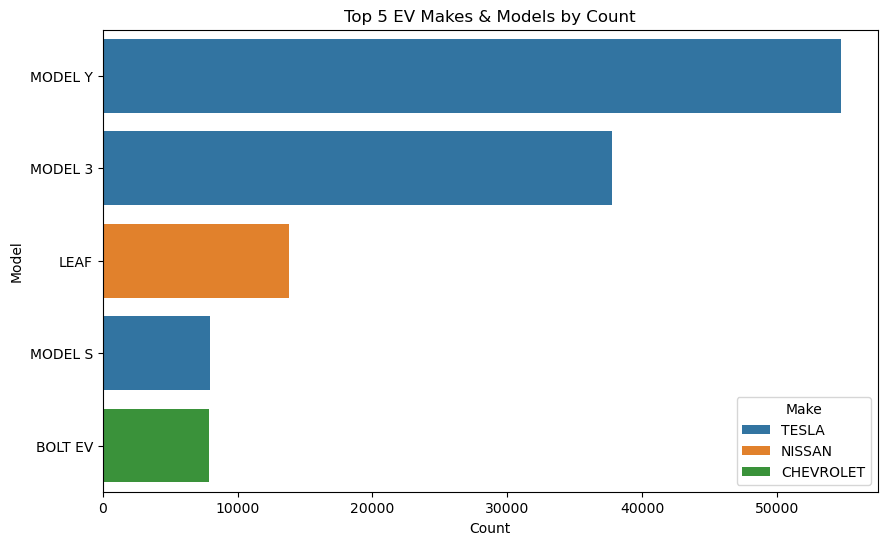

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Model", hue="Make", data=top_ev_models, dodge=False)
plt.title("Top 5 EV Makes & Models by Count")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()

Use a heatmap or choropleth map to visualize EV distribution by county.

In [100]:
county_distribution = df["County"].value_counts().reset_index()

In [101]:
county_distribution.columns = ["County", "Count"]

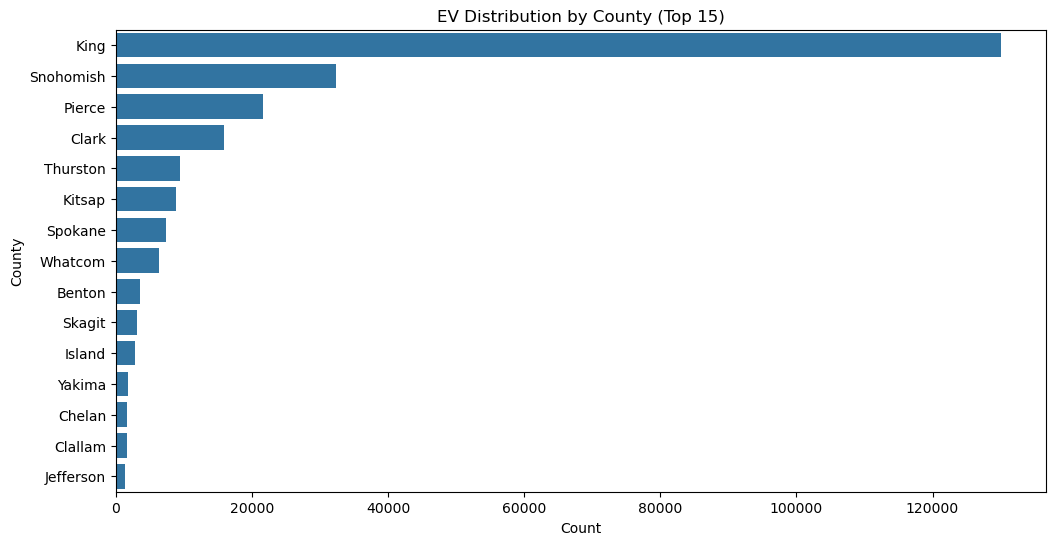

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="County", data=county_distribution.head(15))
plt.title("EV Distribution by County (Top 15)")
plt.xlabel("Count")
plt.ylabel("County")
plt.show()

Create a line graph showing the trend of EV adoption by model year.

In [103]:
ev_by_year = df["Model Year"].value_counts().sort_index().reset_index()
ev_by_year.columns = ["Model Year", "Count"]

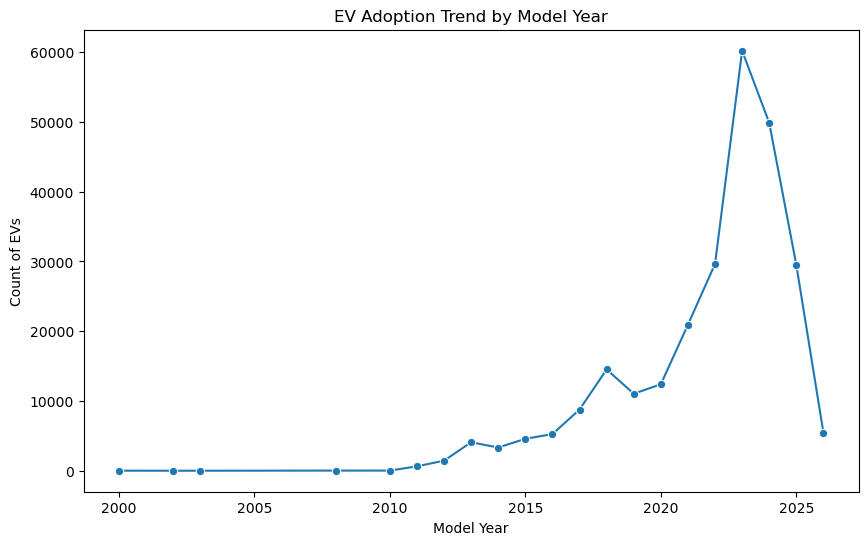

In [104]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Model Year", y="Count", data=ev_by_year, marker="o")
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count of EVs")
plt.show()

Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends

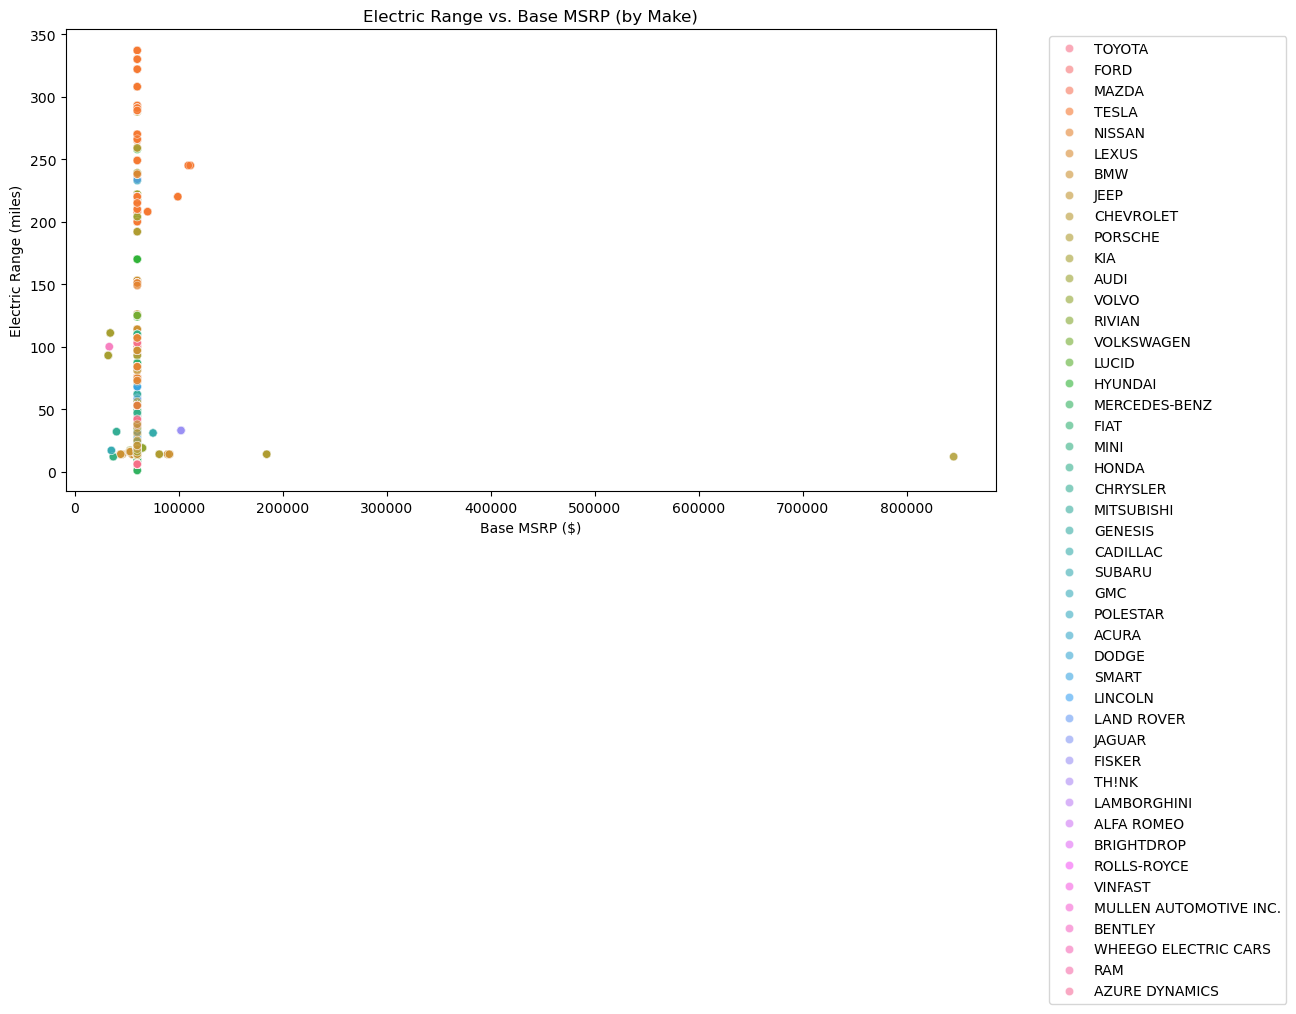

In [110]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Base MSRP", y="Electric Range", hue="Make", alpha=0.6)
plt.title("Electric Range vs. Base MSRP (by Make)")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Electric Range (miles)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.

In [106]:
cafv_col = "Clean Alternative Fuel Vehicle (CAFV) Eligibility"
cafv_counts = df[cafv_col].fillna("Unknown").value_counts()

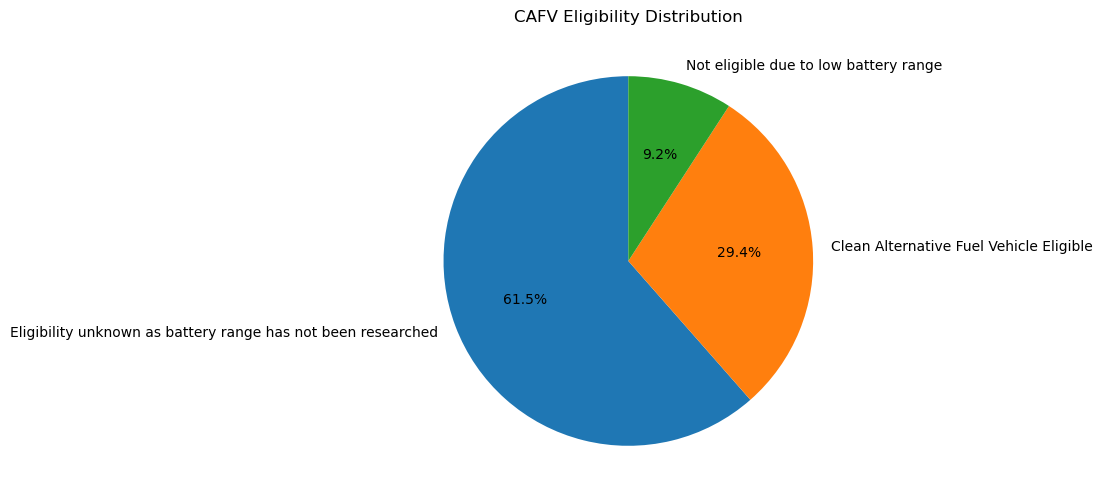

In [107]:
plt.figure(figsize=(6, 6))
cafv_counts.plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("CAFV Eligibility Distribution")
plt.ylabel("")
plt.show()

In [108]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'] \
    .str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)').astype(float)

Use a geospatial map to display EV registrations based on vehicle location

In [112]:
!pip install folium


   ---------------------------------------- 0/2 [branca]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [113]:
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.2 MB 3.2 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/19.2 MB 3.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/19.2 MB 3.2 MB/s eta 0:00:06
   ----- ---------------------------------- 2.6/19.2 MB 3.2 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/19.2 MB 3.2 MB/s eta 0:00:06
   -------- ------------------------------- 3.9/19.2 MB 3.2 MB/s eta 0:00:05
   --------- ------------------------------ 4.5/19.2 MB 3.2 MB/s eta 0:00:05
   ---------- ----------------------------- 5.2/19.2 MB 3.2 MB/s eta 0:00:05
   ------------ --------------------------- 5.8/19.2 MB 3.2 MB/s eta 0:00:05
   ------------- -------------------------- 6.6/19.2 MB 3.2 MB/s eta 0:00:04
   --------------- ------------------------ 7.3/19.2 MB 3.2 MB/s eta 0:00:04
   ---------------- ----------------------- 7.9/19.2 MB 3.2 MB/s eta 0:00:04
   ---

In [114]:
import geopandas as gpd
import folium

In [115]:
m = folium.Map(location=[47.5, -120.5], zoom_start=6)

In [116]:
for _, row in df.dropna(subset=["Latitude", "Longitude"]).iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=2,
        color="blue",
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

In [117]:
m.save("EV_Map.html")
print("Interactive map saved as EV_Map.html (open in browser)")

Interactive map saved as EV_Map.html (open in browser)


# 4.Linear Regression Model Questions

How can we use Linear Regression to predict the Electric Range of a vehicle

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [119]:
df["Electric Range"] = pd.to_numeric(df["Electric Range"], errors="coerce")
df["Base MSRP"] = pd.to_numeric(df["Base MSRP"], errors="coerce")
df["Model Year"] = pd.to_numeric(df["Model Year"], errors="coerce")

In [120]:
df = df.dropna(subset=["Electric Range", "Base MSRP", "Model Year"])

In [121]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,VIN_anon,Longitude,Latitude,GoogleMaps,RegionType
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10,bf01895762,-120.51904,46.59783,"https://www.google.com/maps?q=46.59783,-120.51904",Urban
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,a720d32609,-122.63847,47.54103,"https://www.google.com/maps?q=47.54103,-122.63847",Urban
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10,ef506f78a5,-122.49770,47.79802,"https://www.google.com/maps?q=47.79802,-122.4977",Urban
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10,fb3f4d8c86,-122.89165,47.03954,"https://www.google.com/maps?q=47.03954,-122.89165",Urban
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,5fb1eb0d5a,-122.68993,46.88897,"https://www.google.com/maps?q=46.88897,-122.68993",Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261693,KNDC4DLC8P,Clark,Vancouver,WA,98665.0,2023,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,49.0,234925078,POINT (-122.64443 45.67871),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,a1f2354106,-122.64443,45.67871,"https://www.google.com/maps?q=45.67871,-122.64443",Urban
261694,1GYKPNRL6S,Snohomish,Snohomish,WA,98296.0,2025,CADILLAC,LYRIQ,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,1.0,275487509,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,5.306105e+10,35dc54b9e5,-122.13890,47.87115,"https://www.google.com/maps?q=47.87115,-122.1389",Urban
261695,1N4BZ0CP8G,King,Seattle,WA,98144.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,37.0,117655261,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,85c5705d12,-122.30866,47.57874,"https://www.google.com/maps?q=47.57874,-122.30866",Urban
261696,7SAYGDEE8T,King,Renton,WA,98055.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,33.0,282644701,POINT (-122.20784 47.46004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0187e9334f,-122.20784,47.46004,"https://www.google.com/maps?q=47.46004,-122.20784",Urban


What independent variables (features) can be used to predict Electric Range? (e.g., Model Year, Base MSRP, Make)

In [122]:
X = df[["Model Year", "Base MSRP", "Make", "Model"]]

In [123]:
y = df["Electric Range"]

How do we handle categorical variables like Make and Model in regression analysis?

In [124]:
categorical_features = ["Make", "Model"]

In [125]:
numeric_features = ["Model Year", "Base MSRP"]

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

In [127]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model']),
                                                 ('num', 'passthrough',
                                                  ['Model Year',
                                                   'Base MSRP'])])),
                ('regressor', LinearRegression())])

In [130]:
y_pred = model.predict(X_test)

In [131]:
r2 = r2_score(y_test, y_pred)

In [132]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

 What is the R² score of the model, and what does it indicate about prediction accuracy?

In [134]:
print(f"R² Score: {r2:.3f}")

R² Score: 0.518


 How does the Base MSRP influence the Electric Range according to the regression model

In [135]:
print(f"RMSE: {rmse:.2f} miles")

RMSE: 46.68 miles


What steps are needed to improve the accuracy of the Linear Regression model?

In [136]:
regressor = model.named_steps["regressor"]

In [137]:
encoder = model.named_steps["preprocessor"].named_transformers_["cat"]

In [138]:
encoded_cats = encoder.get_feature_names_out(categorical_features)

In [139]:
all_features = list(encoded_cats) + numeric_features

In [140]:
coeffs = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": regressor.coef_
}).sort_values(by="Coefficient", ascending=False)

In [141]:
print("\n Feature Coefficients (Top 10):")


 Feature Coefficients (Top 10):


In [142]:
print(coeffs.head(10))

           Feature  Coefficient
69   Model_BOLT EV    93.910252
89    Model_E-TRON    86.679777
71      Model_BZ4X    65.596364
146    Model_MACAN    60.181861
108    Model_F-150    47.994506
18     Make_JAGUAR    47.751494
127   Model_I-PACE    47.751494
140       Model_IX    43.941668
129       Model_I4    40.810889
39      Make_TESLA    40.664536


In [143]:
new_ev = pd.DataFrame({
    "Model Year": [2025],
    "Base MSRP": [55000],
    "Make": ["TESLA"],
    "Model": ["MODEL Y"]
})

In [144]:
predicted_range = model.predict(new_ev)

Can we use this model to predict the range of new EV models based on their specifications?

In [145]:
print(f"\n Predicted Electric Range for {new_ev.iloc[0]['Make']} {new_ev.iloc[0]['Model']} ({new_ev.iloc[0]['Model Year']}): {predicted_range[0]:.1f} miles")


 Predicted Electric Range for TESLA MODEL Y (2025): 40.2 miles


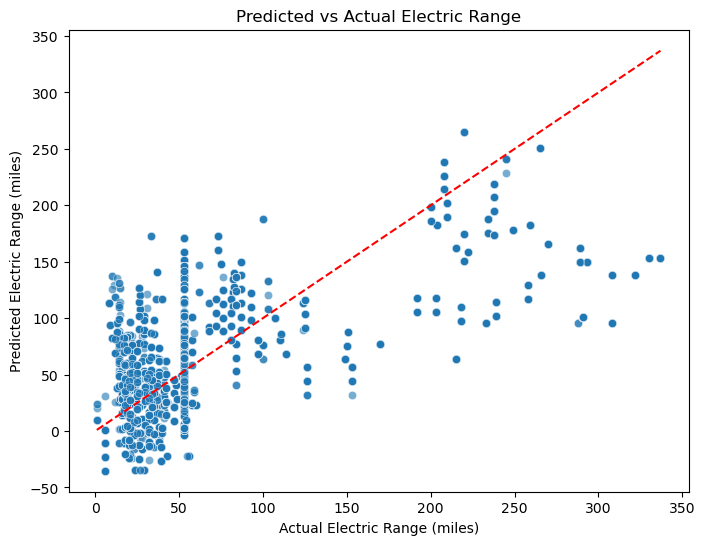

In [146]:
# --- Plot Predicted vs Actual Electric Range ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Electric Range (miles)")
plt.ylabel("Predicted Electric Range (miles)")
plt.title("Predicted vs Actual Electric Range")
plt.show()